# Final Project

In [37]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix



In [50]:
# create 2 copies of the data set and replacing the Zeros with NaN values. 
# we impute it later 
diabetes_df = pd.read_csv('diabetes_data.csv')
diabetes_copy_df= pd.read_csv('diabetes_data.csv')
diabetes_df.head()

diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_df.isnull().sum()

diabetes_df_copy = diabetes_df

In [51]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [52]:
diabetes_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

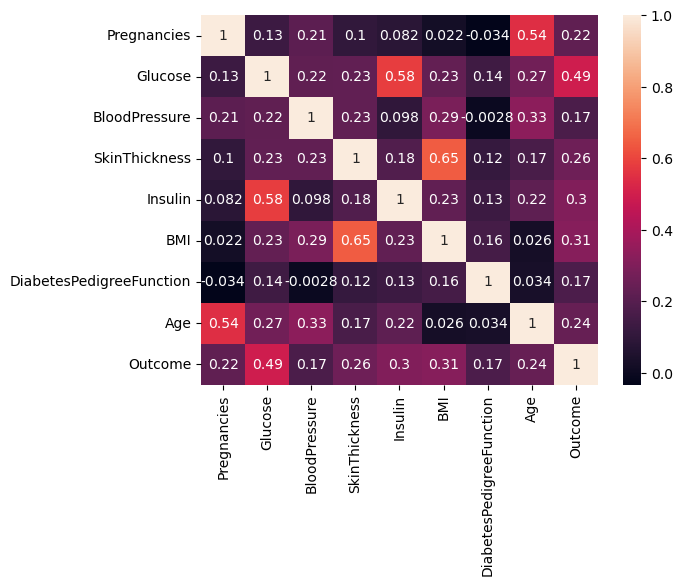

In [53]:
sns.heatmap(diabetes_df.corr(),annot=True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

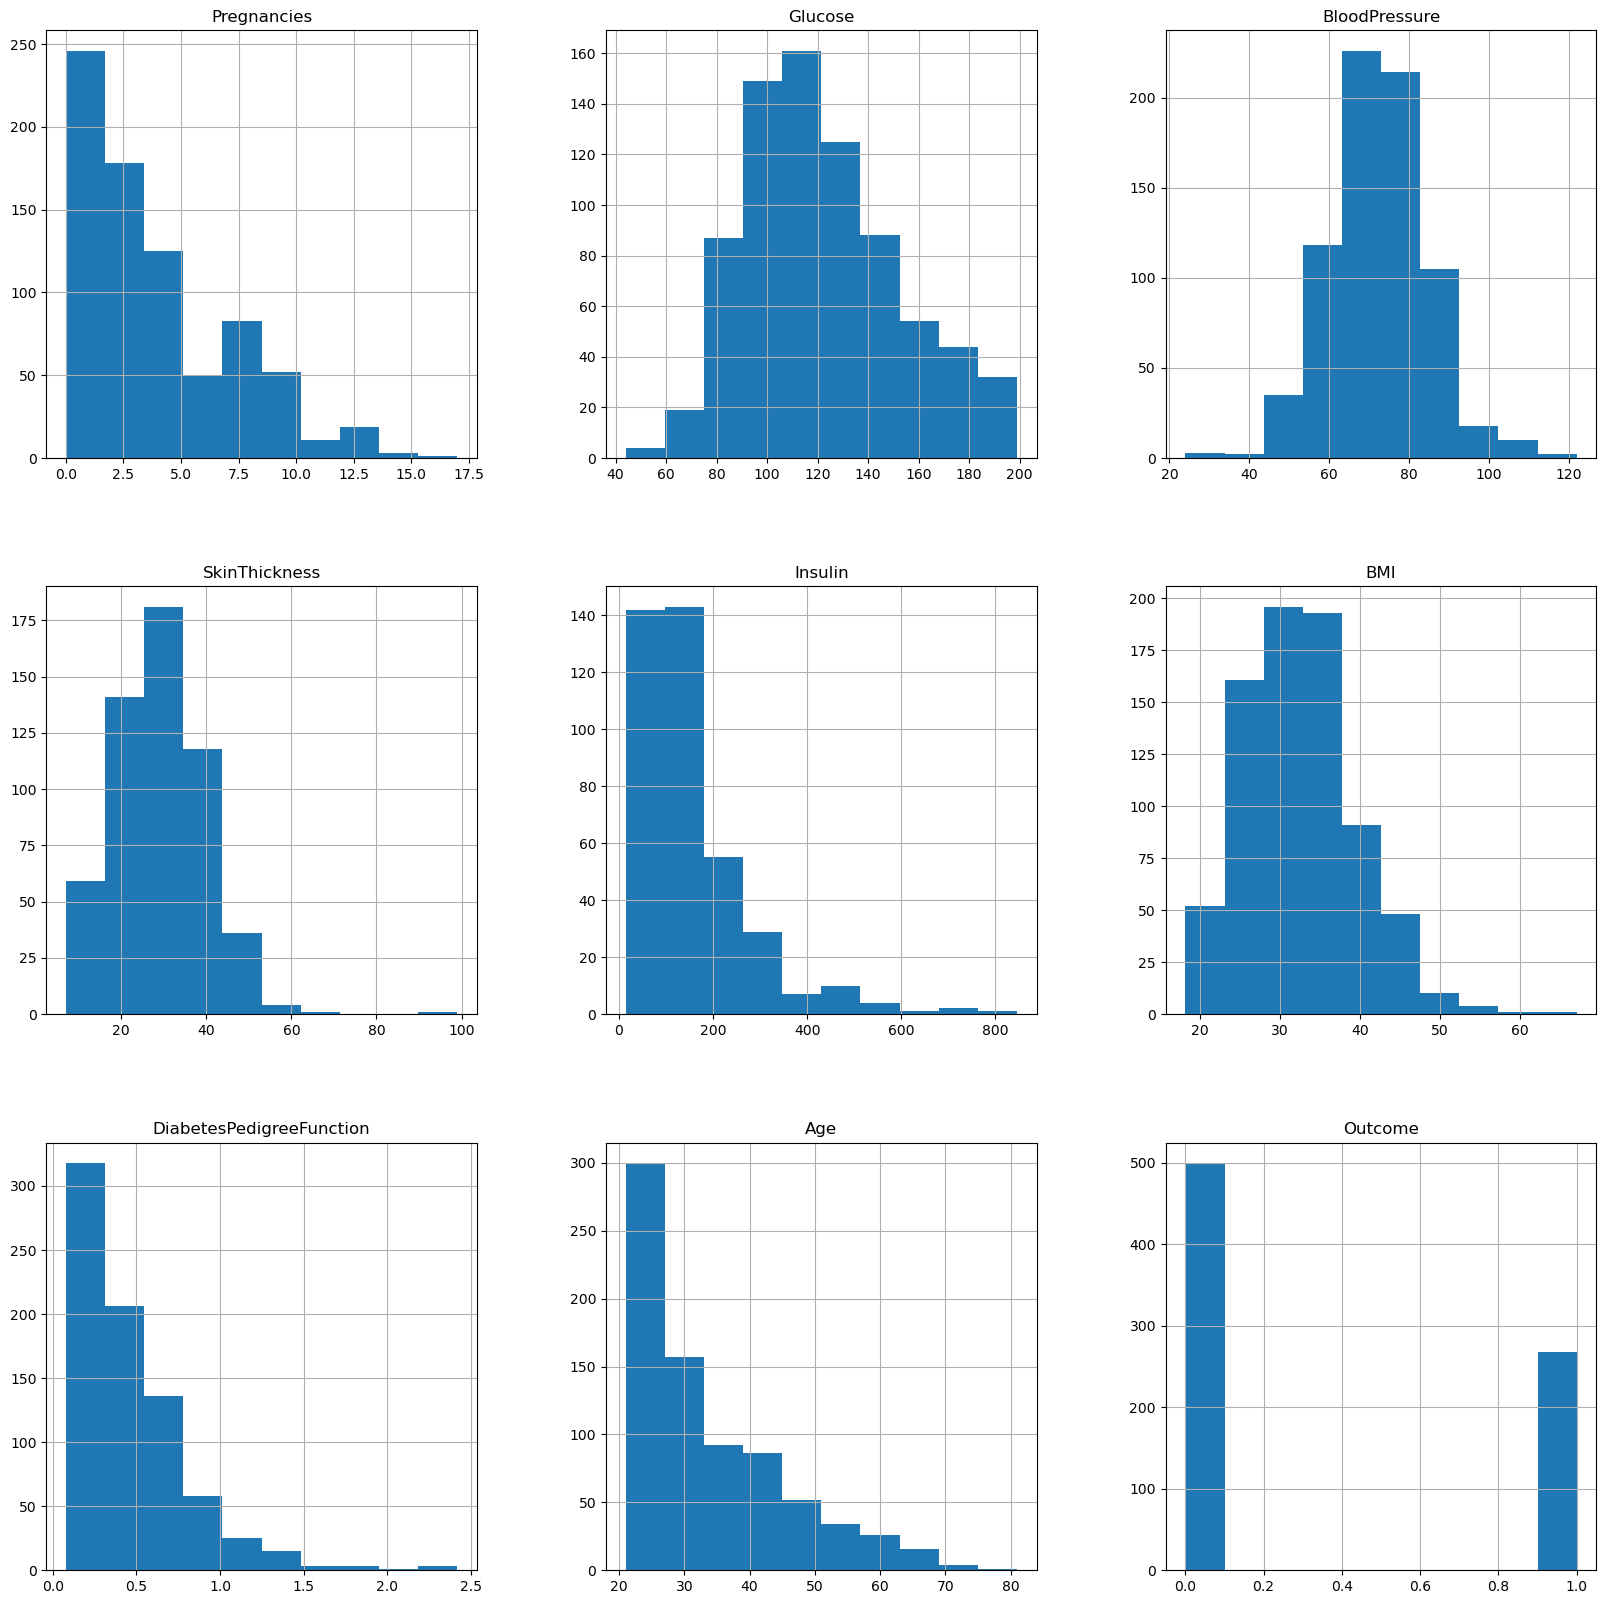

In [54]:
diabetes_df.hist(figsize = (20,20))

Text(0.5, 1.0, 'Diabetes Patient')

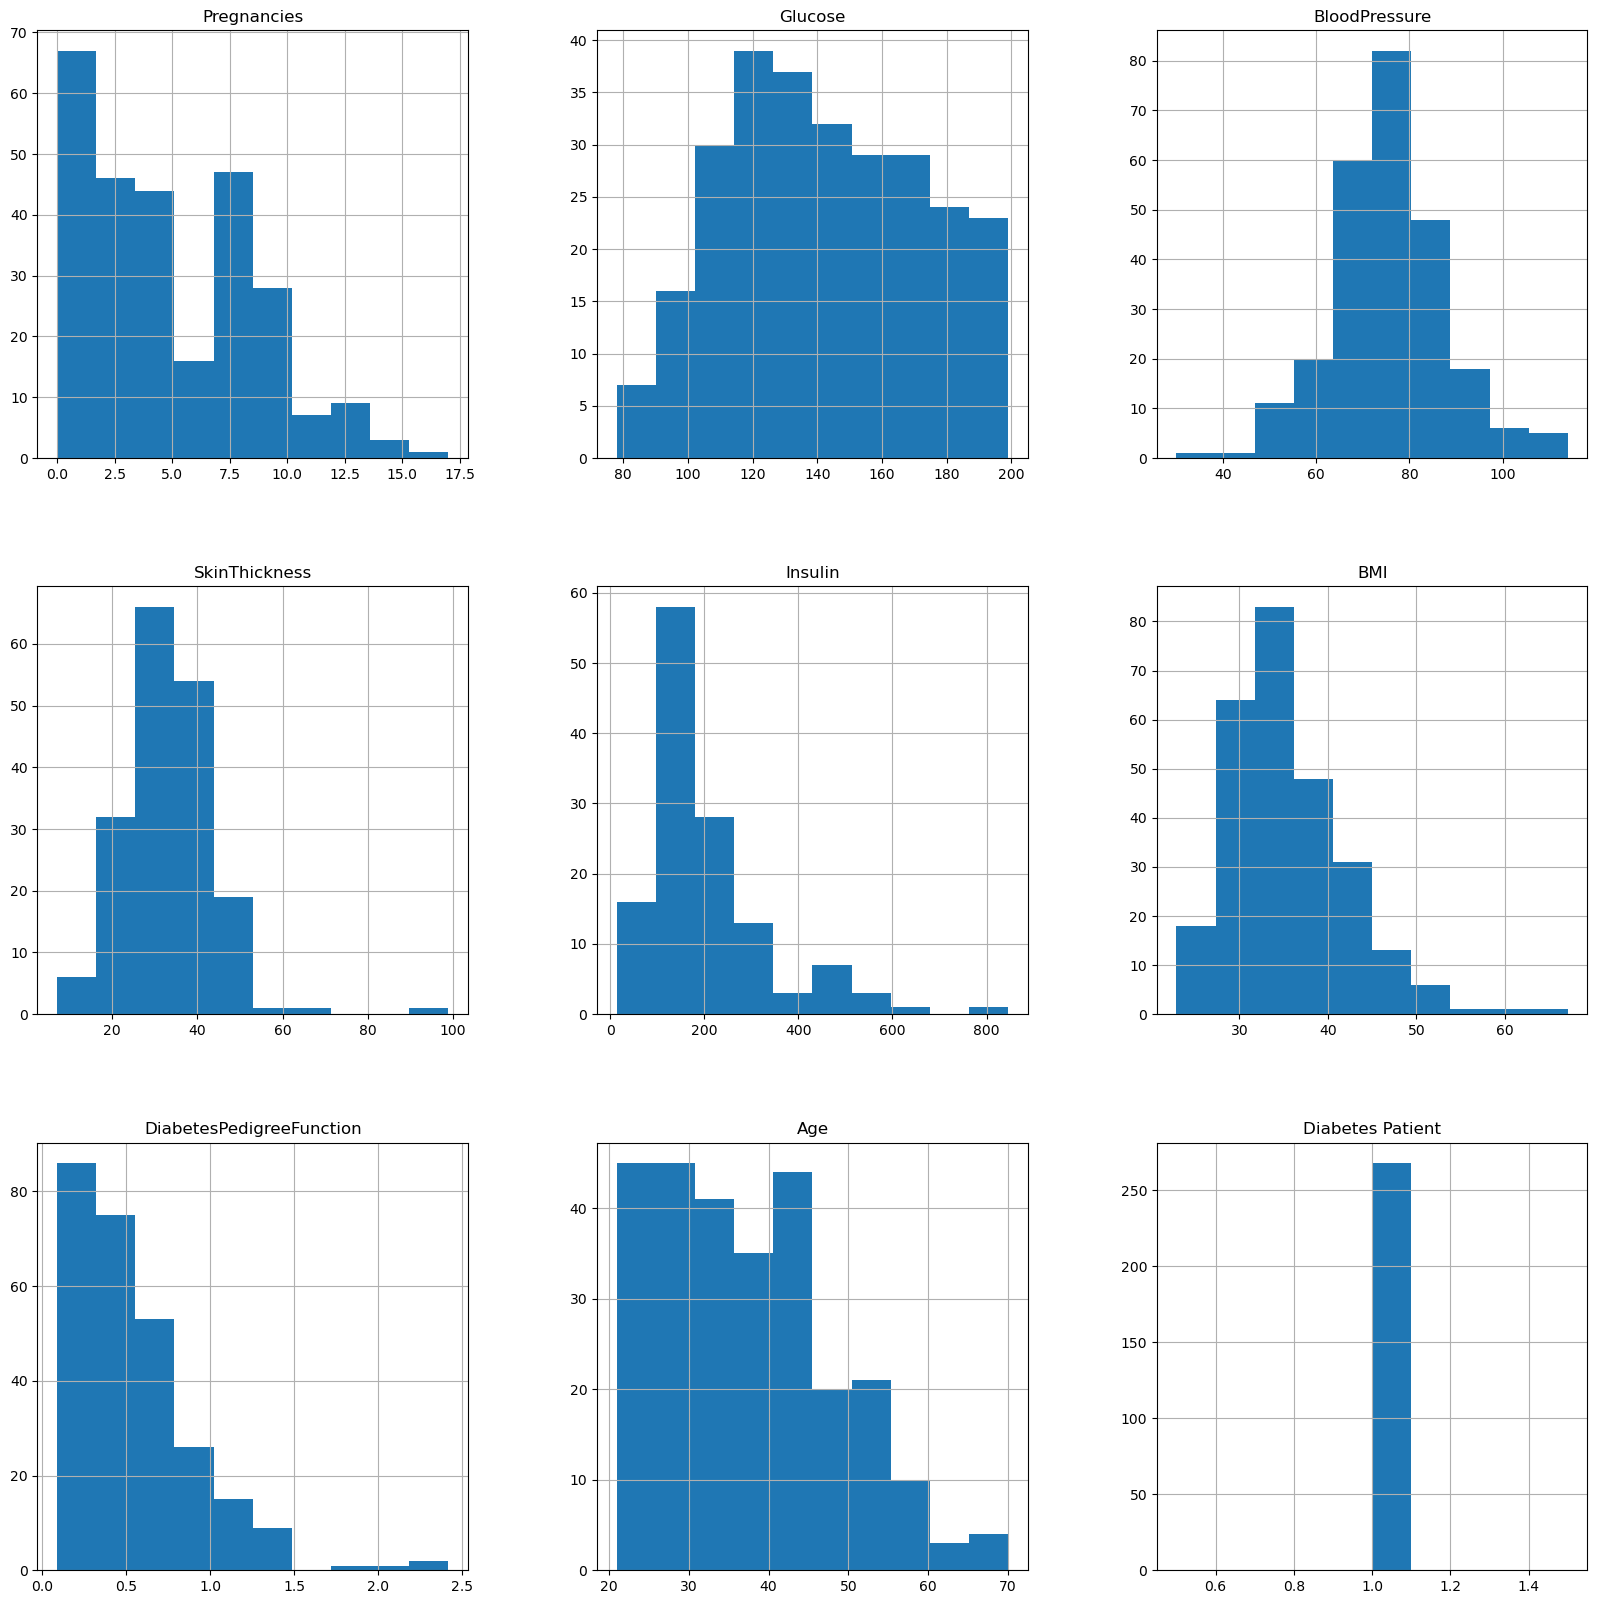

In [23]:
p = diabetes_df[diabetes_df['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')



In [55]:
# Impute the mean value of the column to each missing value

diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True) 
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True) 
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True) 
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True) 
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)


/var/folders/18/fd0gmbyd3yg14p3trxd3tb_h0000gn/T/ipykernel_16119/619473400.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
/var/folders/18/fd0gmbyd3yg14p3trxd3tb_h0000gn/T/ipykernel_16119/619473400.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

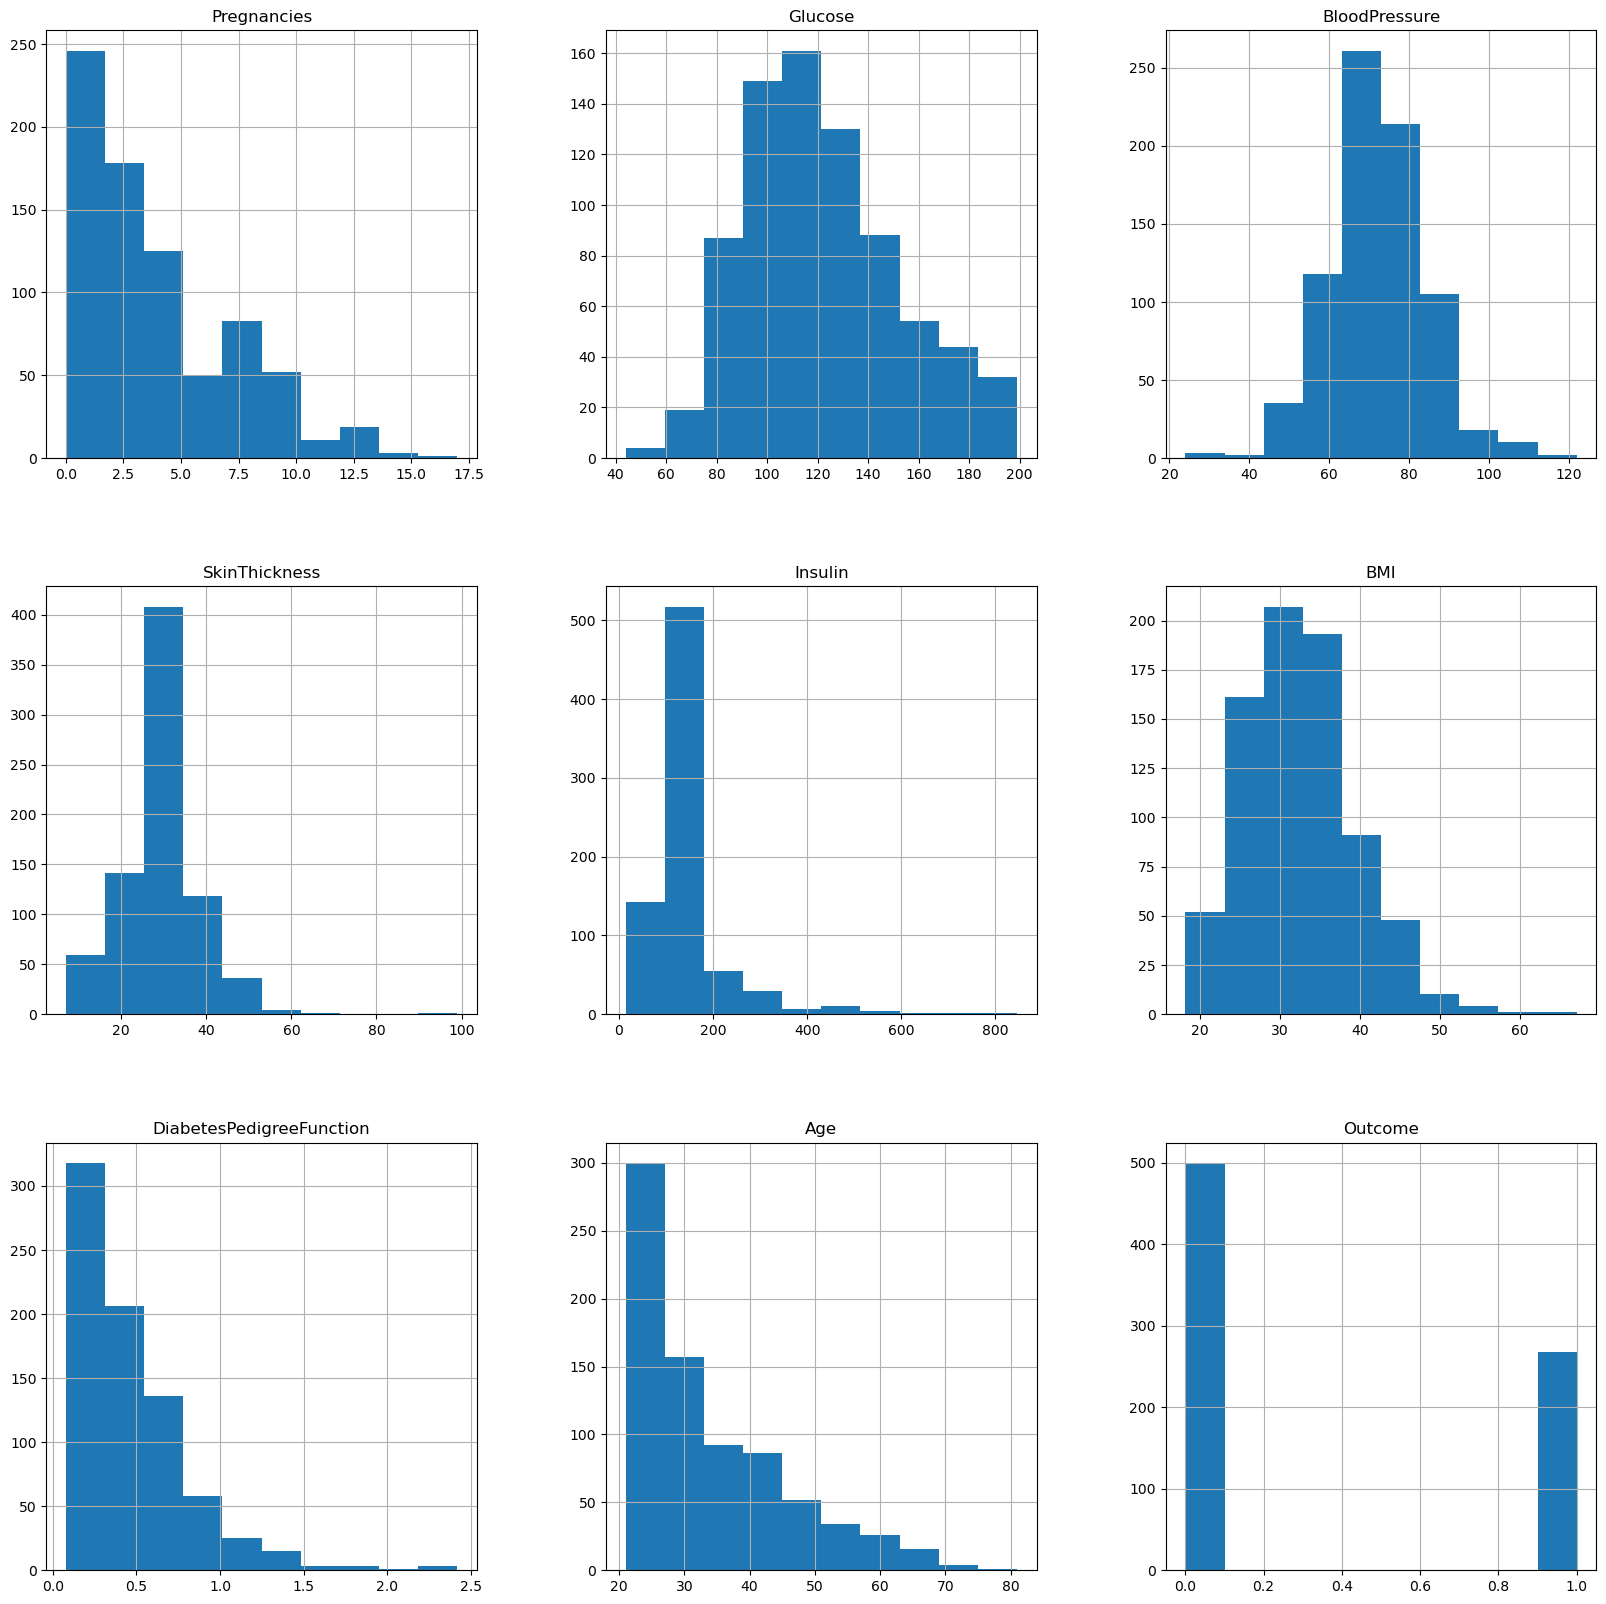

In [56]:
p = diabetes_df_copy.hist(figsize = (20,20))

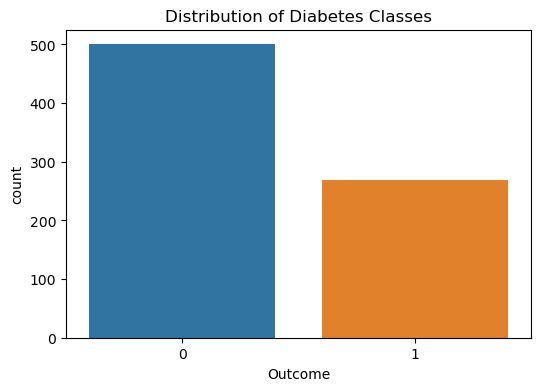

Number of instances where Outcome is 0: 500
Number of instances where Outcome is 1: 268


In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabetes_df_copy)
plt.title("Distribution of Diabetes Classes")
plt.show()

outcome_counts0 = diabetes_df['Outcome'].value_counts()
print("Number of instances where Outcome is 0:", outcome_counts[0])

outcome_counts1 = diabetes_df['Outcome'].value_counts()
print("Number of instances where Outcome is 1:", outcome_counts[1])

In [57]:
# Train-Test Split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']
predicted_class = ['Outcome']
X = diabetes_df_copy[feature_columns].values
y = diabetes_df_copy[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


In [58]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train, y_train)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/Users/nikhita/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nikhita/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nikhita/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [59]:
models = [log_reg, rf_clf, knn]
model_names = ['Logistic Regression', 'Random Forest', 'KNN']

def specificity(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

results = pd.DataFrame(index=model_names, columns=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'ROC AUC'])

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  
    results.loc[name, 'Accuracy'] = accuracy_score(y_test, y_pred)
    results.loc[name, 'Precision'] = precision_score(y_test, y_pred)
    results.loc[name, 'Recall'] = recall_score(y_test, y_pred)
    results.loc[name, 'Specificity'] = specificity(y_test, y_pred)
    results.loc[name, 'F1 Score'] = f1_score(y_test, y_pred)
    results.loc[name, 'ROC AUC'] = roc_auc_score(y_test, y_prob)

print(results)

                     Accuracy Precision    Recall Specificity  F1 Score  \
Logistic Regression  0.731602  0.711864  0.482759    0.881944  0.575342   
Random Forest        0.735931  0.724138  0.482759    0.888889   0.57931   
KNN                  0.709957  0.638889  0.528736    0.819444  0.578616   

                      ROC AUC  
Logistic Regression  0.820961  
Random Forest        0.806833  
KNN                  0.759379  


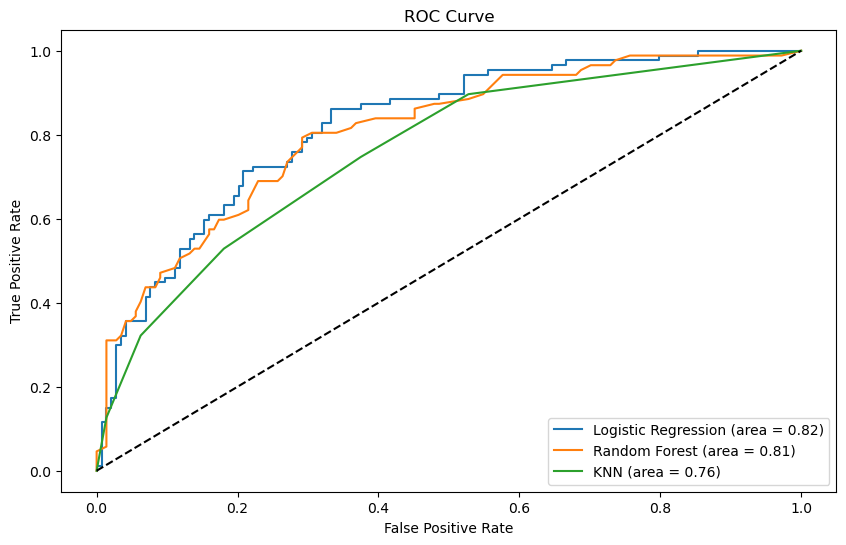

In [35]:
plt.figure(figsize=(10, 6))
for model, name in zip(models, model_names):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
diabetes_df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
